In [12]:
# Import the modules
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [13]:
# Read the  file from folder into a Pandas DataFrame
data = Path('Segundomodelo.xlsx')
df = pd.read_excel(data)


# Review the DataFrame
df.head()


,Country - Country from URL.,D1 - Are you?,D3 - What is the number of inhabitants of the city in which you live?,D5 - What is the gross (average) annual income of your household?,What is the gross (average) annual income of your household per head,D4 - How old are you?,D5 - What is the gross (average) annual income of your household?.1,D7 - What is the highest level of education you have achieved?,"D9 - How many people are in your household (including adults, children and yourself)?",D9a - Played video games,...,PP3 - Better taste,PP3 - Slimming,PP3 - Health/Nutrition,"PP3 - Specific diet (vegan, halal, gluten-free...)",PP3 - Organic,PP3 - Animal welfare,PP3 - Plant-based meat/milk alternatives,PP3 - Environmental respect,PP3 - Respect social,PP3 - Local
0,France||FR,Un homme,10 000 à 49 999 habitants,64999.5,12999.900,59,60 000 € à 69 999 €,Bac+5,5,0,...,5% plus cher,NaN,5% plus cher,NaN,5% plus cher,5% plus cher,NaN,5% plus cher,5% plus cher,5% plus cher
1,France||FR,Une femme,10 000 à 49 999 habitants,10000.0,10000.000,64,Moins de 20 000 €,Bac,1,0,...,"Non, même prix",NaN,"Non, même prix","Non, même prix",NaN,NaN,NaN,"Non, même prix","Non, même prix","Non, même prix"
2,France||FR,Un homme,5 000 à 9 999 habitants,24999.5,6249.875,50,20 000 € à 29 999 €,Bac+2/Bac+3,4,1,...,5% plus cher,10% plus cher,10% plus cher,5% plus cher,5% plus cher,"Non, même prix",NaN,NaN,NaN,5% plus cher
3,France||FR,Une femme,2 000 à 4 999 habitants,24999.5,6249.875,36,20 000 € à 29 999 €,Bac,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France||FR,Un homme,10 000 à 49 999 habitants,24999.5,24999.500,30,20 000 € à 29 999 €,Bac+2/Bac+3,1,1,...,5% plus cher,5% plus cher,5% plus cher,5% plus cher,10% plus cher,NaN,NaN,NaN,NaN,NaN


In [14]:
# List of columns to delete
columns_to_delete = ["D9a - None of these answers", "D5 - What is the gross (average) annual income of your household?.1"]

# Use the drop() method to delete the specified columns and create a new DataFrame without them
df = df.drop(columns=columns_to_delete)

# Display the DataFrame after deleting the columns
df.head()

,Country - Country from URL.,D1 - Are you?,D3 - What is the number of inhabitants of the city in which you live?,D5 - What is the gross (average) annual income of your household?,What is the gross (average) annual income of your household per head,D4 - How old are you?,D7 - What is the highest level of education you have achieved?,"D9 - How many people are in your household (including adults, children and yourself)?",D9a - Played video games,D9a - Bought a grand piano,...,PP3 - Better taste,PP3 - Slimming,PP3 - Health/Nutrition,"PP3 - Specific diet (vegan, halal, gluten-free...)",PP3 - Organic,PP3 - Animal welfare,PP3 - Plant-based meat/milk alternatives,PP3 - Environmental respect,PP3 - Respect social,PP3 - Local
0,France||FR,Un homme,10 000 à 49 999 habitants,64999.5,12999.900,59,Bac+5,5,0,0,...,5% plus cher,NaN,5% plus cher,NaN,5% plus cher,5% plus cher,NaN,5% plus cher,5% plus cher,5% plus cher
1,France||FR,Une femme,10 000 à 49 999 habitants,10000.0,10000.000,64,Bac,1,0,0,...,"Non, même prix",NaN,"Non, même prix","Non, même prix",NaN,NaN,NaN,"Non, même prix","Non, même prix","Non, même prix"
2,France||FR,Un homme,5 000 à 9 999 habitants,24999.5,6249.875,50,Bac+2/Bac+3,4,1,0,...,5% plus cher,10% plus cher,10% plus cher,5% plus cher,5% plus cher,"Non, même prix",NaN,NaN,NaN,5% plus cher
3,France||FR,Une femme,2 000 à 4 999 habitants,24999.5,6249.875,36,Bac,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France||FR,Un homme,10 000 à 49 999 habitants,24999.5,24999.500,30,Bac+2/Bac+3,1,1,0,...,5% plus cher,5% plus cher,5% plus cher,5% plus cher,10% plus cher,NaN,NaN,NaN,NaN,NaN


In [15]:
# Define a dictionary that maps the current column names to the new column names
column_mapping = {
    'Country - Country from URL.': 'Country',
    'D1 - Are you?': 'Gender',
    'D3 - What is the number of inhabitants of the city in which you live?': 'population',
    'D5 - What is the gross (average) annual income of your household?': 'Income',
    'What is the gross (average) annual income of your household per head': 'incomepc',
    'D4 - How old are you?': 'Age',
    'D7 - What is the highest level of education you have achieved?': 'Education',
    'D9 - How many people are in your household (including adults, children and yourself)?': 'pc',
    'D9a - Played video games': 'Videogames',
    'D9a - Bought a grand piano': 'Piano',
    'D9a - Participated in team sports classes': 'Teamsport',
    'D9a - Working out in a gym': 'gym',
    'D9a - Dine in a restaurant': 'Restaurant',
    'D9a - Founded a charity': 'Charity',
    'D9a - Making Online Purchases': 'Ecommerce',
    'PG5 - Do you feel you have enough information about the nutritional quality and environmental/social respect of the products you buy?': 'Information',
    'PP3 - Better taste': 'taste',
    'PP3 - Slimming': 'Slimming',
    'PP3 - Health/Nutrition': 'HealthNutrition',
    'PP3 - Specific diet (vegan, halal, gluten-free...)': 'SpecificDiet',
    'PP3 - Organic': 'Organic',
    'PP3 - Animal welfare': 'AnimalWelfare',
    'PP3 - Plant-based meat/milk alternatives': 'PlantBasedAlternatives',
    'PP3 - Environmental respect': 'EnvironmentalRespect',
    'PP3 - Respect social': 'SocialRespect',
    'PP3 - Local': 'Local'
}

# Use the rename() method to change the column names
df = df.rename(columns=column_mapping)

# Display the DataFrame with the new column names
df.head()


,Country,Gender,population,Income,incomepc,Age,Education,pc,Videogames,Piano,...,taste,Slimming,HealthNutrition,SpecificDiet,Organic,AnimalWelfare,PlantBasedAlternatives,EnvironmentalRespect,SocialRespect,Local
0,France||FR,Un homme,10 000 à 49 999 habitants,64999.5,12999.900,59,Bac+5,5,0,0,...,5% plus cher,NaN,5% plus cher,NaN,5% plus cher,5% plus cher,NaN,5% plus cher,5% plus cher,5% plus cher
1,France||FR,Une femme,10 000 à 49 999 habitants,10000.0,10000.000,64,Bac,1,0,0,...,"Non, même prix",NaN,"Non, même prix","Non, même prix",NaN,NaN,NaN,"Non, même prix","Non, même prix","Non, même prix"
2,France||FR,Un homme,5 000 à 9 999 habitants,24999.5,6249.875,50,Bac+2/Bac+3,4,1,0,...,5% plus cher,10% plus cher,10% plus cher,5% plus cher,5% plus cher,"Non, même prix",NaN,NaN,NaN,5% plus cher
3,France||FR,Une femme,2 000 à 4 999 habitants,24999.5,6249.875,36,Bac,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France||FR,Un homme,10 000 à 49 999 habitants,24999.5,24999.500,30,Bac+2/Bac+3,1,1,0,...,5% plus cher,5% plus cher,5% plus cher,5% plus cher,10% plus cher,NaN,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['Country', 'Gender', 'population', 'Income', 'incomepc', 'Age',
       'Education', 'pc', 'Videogames', 'Piano', 'Teamsport', 'gym',
       'Restaurant', 'Charity', 'Ecommerce', 'Information', 'taste',
       'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
       'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
       'SocialRespect', 'Local'],
      dtype='object')

In [19]:
# Confirm the unique values from PP3 - Better taste
unique_values = df['Information'].unique()
print(unique_values)

[1 0 2]


In [18]:
# Create a dictionary to map the textual values to numerical values
replace_dict = {
    'Oui, partiellement': 1,
    'Non, pas du tout': 0,
    'Oui, tout à fait': 2
}

# List of columns to apply the replacement to
columns_to_replace = ['Information']

# Use a loop to replace values in each of the specified columns
for column in columns_to_replace:
    df[column] = df[column].replace(replace_dict)

# Review the DataFrame
df.head()


,Country,Gender,population,Income,incomepc,Age,Education,pc,Videogames,Piano,...,taste,Slimming,HealthNutrition,SpecificDiet,Organic,AnimalWelfare,PlantBasedAlternatives,EnvironmentalRespect,SocialRespect,Local
0,France||FR,Un homme,10 000 à 49 999 habitants,64999.5,12999.900,59,Bac+5,5,0,0,...,5% plus cher,NaN,5% plus cher,NaN,5% plus cher,5% plus cher,NaN,5% plus cher,5% plus cher,5% plus cher
1,France||FR,Une femme,10 000 à 49 999 habitants,10000.0,10000.000,64,Bac,1,0,0,...,"Non, même prix",NaN,"Non, même prix","Non, même prix",NaN,NaN,NaN,"Non, même prix","Non, même prix","Non, même prix"
2,France||FR,Un homme,5 000 à 9 999 habitants,24999.5,6249.875,50,Bac+2/Bac+3,4,1,0,...,5% plus cher,10% plus cher,10% plus cher,5% plus cher,5% plus cher,"Non, même prix",NaN,NaN,NaN,5% plus cher
3,France||FR,Une femme,2 000 à 4 999 habitants,24999.5,6249.875,36,Bac,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France||FR,Un homme,10 000 à 49 999 habitants,24999.5,24999.500,30,Bac+2/Bac+3,1,1,0,...,5% plus cher,5% plus cher,5% plus cher,5% plus cher,10% plus cher,NaN,NaN,NaN,NaN,NaN


In [20]:
# Confirm the unique values from PP3 - Better taste
unique_values = df['taste'].unique()
print(unique_values)

['5% plus cher' 'Non, même prix' nan '10% plus cher' '20% plus cher']


In [21]:
# Create a dictionary to map the textual values to numerical values
replace_dict = {
    '5% plus cher': 5,
    'Non, même prix': 0,
    '10% plus cher': 10,
    '20% plus cher': 20
}

# List of columns to apply the replacement to
columns_to_replace = ['taste', 'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
                      'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
                      'SocialRespect', 'Local']

# Use a loop to replace values in each of the specified columns
for column in columns_to_replace:
    df[column] = df[column].replace(replace_dict)

# Review the DataFrame
df.head()


,Country,Gender,population,Income,incomepc,Age,Education,pc,Videogames,Piano,...,taste,Slimming,HealthNutrition,SpecificDiet,Organic,AnimalWelfare,PlantBasedAlternatives,EnvironmentalRespect,SocialRespect,Local
0,France||FR,Un homme,10 000 à 49 999 habitants,64999.5,12999.900,59,Bac+5,5,0,0,...,5.0,NaN,5.0,NaN,5.0,5.0,NaN,5.0,5.0,5.0
1,France||FR,Une femme,10 000 à 49 999 habitants,10000.0,10000.000,64,Bac,1,0,0,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2,France||FR,Un homme,5 000 à 9 999 habitants,24999.5,6249.875,50,Bac+2/Bac+3,4,1,0,...,5.0,10.0,10.0,5.0,5.0,0.0,NaN,NaN,NaN,5.0
3,France||FR,Une femme,2 000 à 4 999 habitants,24999.5,6249.875,36,Bac,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France||FR,Un homme,10 000 à 49 999 habitants,24999.5,24999.500,30,Bac+2/Bac+3,1,1,0,...,5.0,5.0,5.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN


In [22]:
# Confirm the unique values from population
unique_values = df['population'].unique()
print(unique_values)

['10 000 à 49 999 habitants' '5 000 à 9 999 habitants'
 '2 000 à 4 999 habitants' 'Moins de 2 000 habitants'
 '50 000 à 99 999 habitants' '100 000 à 499 999 habitants'
 '1 million et plus d’habitants' '500 000 à 999 999 habitants']


In [23]:
# Create a dictionary to map the textual values to numerical values
replace_dict = {
    'Moins de 2 000 habitants': 1000,
    '2 000 à 4 999 habitants': 3500,
    '5 000 à 9 999 habitants': 7500,
    '10 000 à 49 999 habitants': 30000,
    '50 000 à 99 999 habitants': 75000,
    '100 000 à 499 999 habitants': 30000,
    '500 000 à 999 999 habitants': 750000,
    '1 million et plus d’habitants': 1000000
    
}

# Use the replace() method to replace the values in the column
df['population'] = df['population'].replace(replace_dict)

# Review the DataFrame
df.head()

    

,Country,Gender,population,Income,incomepc,Age,Education,pc,Videogames,Piano,...,taste,Slimming,HealthNutrition,SpecificDiet,Organic,AnimalWelfare,PlantBasedAlternatives,EnvironmentalRespect,SocialRespect,Local
0,France||FR,Un homme,30000,64999.5,12999.900,59,Bac+5,5,0,0,...,5.0,NaN,5.0,NaN,5.0,5.0,NaN,5.0,5.0,5.0
1,France||FR,Une femme,30000,10000.0,10000.000,64,Bac,1,0,0,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2,France||FR,Un homme,7500,24999.5,6249.875,50,Bac+2/Bac+3,4,1,0,...,5.0,10.0,10.0,5.0,5.0,0.0,NaN,NaN,NaN,5.0
3,France||FR,Une femme,3500,24999.5,6249.875,36,Bac,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France||FR,Un homme,30000,24999.5,24999.500,30,Bac+2/Bac+3,1,1,0,...,5.0,5.0,5.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN


In [24]:
# # Confirm the unique values from Education
# unique_values = df['Education'].unique()
# print(unique_values)

In [25]:
# # Create a dictionary to map the textual values to numerical values
# replace_dict = {
#     'Collège': 7,
#     'Bac': 8,
#     'Bac+2/Bac+3': 10,
#     'Bac+5': 12,
#     'Doctorat': 14
# }

# # Use the replace() method to replace the values in the column
# df['Education'] = df['Education'].replace(replace_dict)

# # Review the DataFrame
# df.head()

    

In [26]:
# Confirm the unique values from Country
unique_values = df['Country'].unique()
print(unique_values)

['France||FR' 'UK||GB' 'Germany||DE' 'Spain||ES']


In [27]:

replace_dict = {
    'France||FR': 'FR',
    'UK||GB':'UK',
    'Germany||DE': 'DE',
    'Spain||ES': 'ES'
}

# Use the replace() method to replace the values in the column
df['Country'] = df['Country'].replace(replace_dict)

# Review the DataFrame
df.head()


,Country,Gender,population,Income,incomepc,Age,Education,pc,Videogames,Piano,...,taste,Slimming,HealthNutrition,SpecificDiet,Organic,AnimalWelfare,PlantBasedAlternatives,EnvironmentalRespect,SocialRespect,Local
0,FR,Un homme,30000,64999.5,12999.900,59,Bac+5,5,0,0,...,5.0,NaN,5.0,NaN,5.0,5.0,NaN,5.0,5.0,5.0
1,FR,Une femme,30000,10000.0,10000.000,64,Bac,1,0,0,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2,FR,Un homme,7500,24999.5,6249.875,50,Bac+2/Bac+3,4,1,0,...,5.0,10.0,10.0,5.0,5.0,0.0,NaN,NaN,NaN,5.0
3,FR,Une femme,3500,24999.5,6249.875,36,Bac,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FR,Un homme,30000,24999.5,24999.500,30,Bac+2/Bac+3,1,1,0,...,5.0,5.0,5.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Confirm the unique values from Information
# unique_values = df['Information'].unique()
# print(unique_values)

In [ ]:

# replace_dict = {
#     'Non, pas du tout': 0,
#     'Oui, partiellement': 1,
#     'Oui, tout à fait': 2
# }

# # Use the replace() method to replace the values in the column
# df['Information'] = df['Information'].replace(replace_dict)

# # Review the DataFrame
# df.head()


In [28]:
# Confirm the unique values from Gender
unique_values = df['Gender'].unique()
print(unique_values)

['Un homme' 'Une femme']


In [29]:

replace_dict = {
    'Un homme': 1,
    'Une femme': 0
}

# Use the replace() method to replace the values in the column
df['Gender'] = df['Gender'].replace(replace_dict)

# Review the DataFrame
df.head()


,Country,Gender,population,Income,incomepc,Age,Education,pc,Videogames,Piano,...,taste,Slimming,HealthNutrition,SpecificDiet,Organic,AnimalWelfare,PlantBasedAlternatives,EnvironmentalRespect,SocialRespect,Local
0,FR,1,30000,64999.5,12999.900,59,Bac+5,5,0,0,...,5.0,NaN,5.0,NaN,5.0,5.0,NaN,5.0,5.0,5.0
1,FR,0,30000,10000.0,10000.000,64,Bac,1,0,0,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2,FR,1,7500,24999.5,6249.875,50,Bac+2/Bac+3,4,1,0,...,5.0,10.0,10.0,5.0,5.0,0.0,NaN,NaN,NaN,5.0
3,FR,0,3500,24999.5,6249.875,36,Bac,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FR,1,30000,24999.5,24999.500,30,Bac+2/Bac+3,1,1,0,...,5.0,5.0,5.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN


In [30]:
unique_values = df[['taste', 'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
                   'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
                   'SocialRespect', 'Local']].apply(lambda x: x.unique())

print(unique_values)


   taste  Slimming  HealthNutrition  SpecificDiet  Organic  AnimalWelfare  \
0    5.0       NaN              5.0           NaN      5.0            5.0   
1    0.0      10.0              0.0           0.0      NaN            NaN   
2    NaN       5.0             10.0           5.0     10.0            0.0   
3   10.0       0.0              NaN          10.0      0.0           10.0   
4   20.0      20.0             20.0          20.0     20.0           20.0   

   PlantBasedAlternatives  EnvironmentalRespect  SocialRespect  Local  
0                     NaN                   5.0            5.0    5.0  
1                     0.0                   0.0            0.0    0.0  
2                     5.0                   NaN            NaN    NaN  
3                    10.0                  10.0           10.0   20.0  
4                    20.0                  20.0           20.0   10.0  


In [31]:
# List of columns to perform replacements in
columns_to_replace = ['taste', 'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
                      'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
                      'SocialRespect', 'Local']

# Replace NaN values with 0 in the specified columns
df[columns_to_replace] = df[columns_to_replace].fillna(0)

# Replace 20 with 10 in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace(20, 10)

df.head()


,Country,Gender,population,Income,incomepc,Age,Education,pc,Videogames,Piano,...,taste,Slimming,HealthNutrition,SpecificDiet,Organic,AnimalWelfare,PlantBasedAlternatives,EnvironmentalRespect,SocialRespect,Local
0,FR,1,30000,64999.5,12999.900,59,Bac+5,5,0,0,...,5.0,0.0,5.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0
1,FR,0,30000,10000.0,10000.000,64,Bac,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FR,1,7500,24999.5,6249.875,50,Bac+2/Bac+3,4,1,0,...,5.0,10.0,10.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0
3,FR,0,3500,24999.5,6249.875,36,Bac,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FR,1,30000,24999.5,24999.500,30,Bac+2/Bac+3,1,1,0,...,5.0,5.0,5.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Count the number of NaN values per column
nan_counts = df.head().isna().sum()

# Display the number of NaN values per column
print(nan_counts)


Country                   0
Gender                    0
population                0
Income                    0
incomepc                  0
Age                       0
Education                 0
pc                        0
Videogames                0
Piano                     0
Teamsport                 0
gym                       0
Restaurant                0
Charity                   0
Ecommerce                 0
Information               0
taste                     0
Slimming                  0
HealthNutrition           0
SpecificDiet              0
Organic                   0
AnimalWelfare             0
PlantBasedAlternatives    0
EnvironmentalRespect      0
SocialRespect             0
Local                     0
dtype: int64


In [33]:
df.columns

Index(['Country', 'Gender', 'population', 'Income', 'incomepc', 'Age',
       'Education', 'pc', 'Videogames', 'Piano', 'Teamsport', 'gym',
       'Restaurant', 'Charity', 'Ecommerce', 'Information', 'taste',
       'Slimming', 'HealthNutrition', 'SpecificDiet', 'Organic',
       'AnimalWelfare', 'PlantBasedAlternatives', 'EnvironmentalRespect',
       'SocialRespect', 'Local'],
      dtype='object')

In [34]:
# Import the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create a DataFrame with the scaled data for selected columns
df_scaled = df[["population", "Income", "incomepc", "Age", "pc"]].copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_scaled[["population", "Income", "incomepc", "Age", "pc"]] = scaler.fit_transform(df[["population", "Income", "incomepc", "Age", "pc"]])

# Copy the remaining columns to df_scaled
df_scaled[["Country", "Gender", "Videogames", "Piano", "Teamsport", "gym", "Restaurant", "Charity", "Ecommerce", "Information", "taste", "Education", "Slimming", "HealthNutrition", "SpecificDiet", "Organic", "AnimalWelfare", "PlantBasedAlternatives", "EnvironmentalRespect", "SocialRespect", "Local"]] = df[["Country", "Gender", "Videogames", "Piano", "Teamsport", "gym", "Restaurant", "Charity", "Ecommerce", "Information", "taste", "Education", "Slimming", "HealthNutrition", "SpecificDiet", "Organic", "AnimalWelfare", "PlantBasedAlternatives", "EnvironmentalRespect", "SocialRespect", "Local"]]

# Define the desired column order
column_order = [
    "Country", "Gender", "population", "Income", "incomepc", "Age", "Education", "pc",
    "Videogames", "Piano", "Teamsport", "gym", "Restaurant", "Charity", "Ecommerce", "Information", "taste",
    "Slimming", "HealthNutrition", "SpecificDiet", "Organic", "AnimalWelfare", "PlantBasedAlternatives",
    "EnvironmentalRespect", "SocialRespect", "Local"
]

# Reorder the columns in the DataFrame
df_scaled = df_scaled[column_order]

# Display the DataFrame with the reordered columns and scaled values
df_scaled.head()


,Country,Gender,population,Income,incomepc,Age,Education,pc,Videogames,Piano,...,taste,Slimming,HealthNutrition,SpecificDiet,Organic,AnimalWelfare,PlantBasedAlternatives,EnvironmentalRespect,SocialRespect,Local
0,FR,1,-0.457654,1.018406,-0.366926,0.627730,Bac+5,1.924568,0,0,...,5.0,0.0,5.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0
1,FR,0,-0.457654,-1.119817,-0.597641,0.937340,Bac,-1.159560,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FR,1,-0.523839,-0.536680,-0.886053,0.070433,Bac+2/Bac+3,1.153536,1,0,...,5.0,10.0,10.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0
3,FR,0,-0.535606,-0.536680,-0.886053,-0.796474,Bac,1.153536,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FR,1,-0.457654,-0.536680,0.555930,-1.168005,Bac+2/Bac+3,-1.159560,1,0,...,5.0,5.0,5.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Specify the columns to convert to dummies
# columns_to_dummies = ["Country","Gender","Videogames","Piano","Teamsport","gym","Restaurant","Charity","Ecommerce","Information" ]
columns_to_dummies = ["Country", "Education","Information"]

# Convert categorical data to numeric with pd.get_dummies
df = pd.get_dummies(df, columns=columns_to_dummies)
df.head()


,Gender,population,Income,incomepc,Age,pc,Videogames,Piano,Teamsport,gym,...,Country_FR,Country_UK,Education_Bac,Education_Bac+2/Bac+3,Education_Bac+5,Education_Collège,Education_Doctorat,Information_0,Information_1,Information_2
0,1,30000,64999.5,12999.900,59,5,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,0,30000,10000.0,10000.000,64,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2,1,7500,24999.5,6249.875,50,4,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,3500,24999.5,6249.875,36,4,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,1,30000,24999.5,24999.500,30,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jlozan02\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

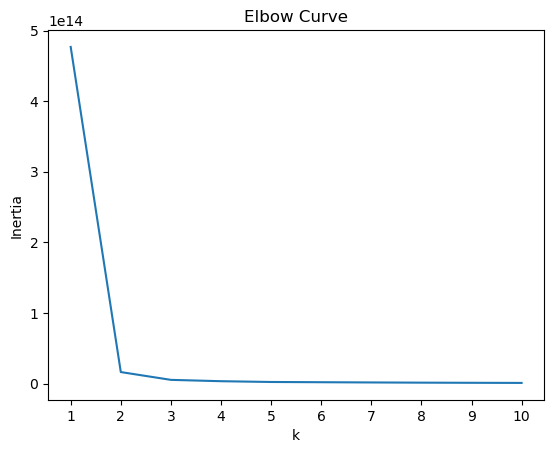

In [36]:
# CLUSTER

from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Exclude the "taste" column from df_scaled (assuming it's a Pandas DataFrame).
# 2. Create a KMeans model using the loop counter for the n_clusters.
# 3. Fit the model to the data without the "taste" column.
# 4. Append the model.inertia_ to the inertia list.
for i in k:
    # Exclude the "taste" column from df_scaled
    df_cluster_data = df.drop(columns=["taste"])
    
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_cluster_data)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow1 = pd.DataFrame(elbow_data)

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(df_elbow1["k"], df_elbow1["inertia"])
plt.title("Elbow Curve")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.xticks(k)
plt.show()


In [ ]:
# cLUSTER
# This part was added to double check if adding clusters of the type of clients would increase the explanatory power of the models
# After a review of the performance of the model with and without the clusterirazion, we concluded that this actually decreased the accuracy of our models, so we deleted this variable from the models



# Assuming df_scaled contains the scaled data

# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

# Fit the K-Means model using the scaled data
model.fit(df_cluster_data)

# Predict the clusters to group the cryptocurrencies using the scaled data
segments = model.predict(df_cluster_data)

# Convert the segments array into a DataFrame
segments_df = pd.DataFrame(segments, columns=['segments'])

# Create a copy of the scaled DataFrame
df_cluster_data = df_cluster_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_cluster_data['segments'] = segments_df

# Display sample data
df_cluster_data.head()
df_cluster_data.columns


In [ ]:
# cLUSTER
# Count the number of NaN values per column
nan_counts = df_cluster_data.isna().sum()

# Display the number of NaN values per column
print(nan_counts)


In [ ]:
df_cluster_data.head()

In [ ]:
# cLUSTER
df['segments'] = df_cluster_data['segments']

result = df.groupby('segments').count()

print(result)



In [ ]:
df.head()

result = df.groupby('segments').mean()

print(result)



In [ ]:
# cLUSTER
df_scaled['segments'] = df_cluster_data['segments']
df_scaled.head()

In [ ]:
# Count the number of NaN values per column
nan_counts = df_scaled.isna().sum()

# Display the number of NaN values per column
print(nan_counts)

# df_scaled.head()



